# ECE-3 Lab 6

## Linear Functions

$\color{#EF5645}{\text{Definition}}$: We say that the function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ satistifies the superposition property if, for all scalars $\alpha, \beta$ and all $n$-vectors $x, y$:

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y).$$

$\color{#EF5645}{\text{Definition}}$: A function that satisfies superposition is called linear.

$\color{#6D7D33}{\text{Proposition}}$: A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ is linear if and only if, for all $n$-vector $x$, $f(x) = A x$ for some $m \times n$ matrix $A$.



### Exercise 1

Consider a function $f:\mathbb{R}^3 \rightarrow \mathbb{R}^3$ defined by:
$$f\left(\begin{bmatrix}
x_1 \\
x_2 \\
x_3\end{bmatrix}\right) = \begin{bmatrix}
4x_2 +x_3\\
- x_1 + 5 x_2  \\
2 x_3\end{bmatrix}.$$
Find matrix $A$ such that: $f(x) = Ax$ and use Python to verify.


In [ ]:
# insert your code here
import numpy as np

A = np.array([[0, 4, 1],[-1, 5, 0],[0, 0, 2]])
print(A)

[[ 0  4  1]
 [-1  5  0]
 [ 0  0  2]]


## Affine Functions

$\color{#EF5645}{\text{Definition}}$: A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ that is linear plus a constant is called affine. Its general form is:

$$f(x) = Ax+b \quad \text{with $A$ an $m\times n$ matrix and $b$ a $m$-vector}$$

$\color{#6D7D33}{\text{Proposition}}$:
 A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ is affine and obeys the superposition principle if and only if, for all scalars $\alpha, \beta$ with $\alpha + \beta = 1$ and all $n$-vectors $x, y$, we have:
$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y).$$

$f(\alpha x + \beta y) = A (\alpha x + \beta y) + b  = A\alpha x + A \beta y + b$

$\alpha f(x) + \beta f(y) = \alpha ( Ax+b) + \beta (Ay+b) = A \alpha x + A \beta y + (\alpha + \beta) b$ 

### Exercise 2

Why is the property $\alpha + \beta = 1$ important?



It is needed for the above two equations to be equal

### Exercise 3



Consider the function $\textbf{f}: \mathbb{R}^4 \rightarrow \mathbb{R}^2$ such that

$\textbf{f}(\textbf{x}) = \textbf{f}\left(\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{bmatrix}\right) = \begin{bmatrix}
x_1 + x_2\\
x_3 - x_4
\end{bmatrix} = \textbf{A}\textbf{x}$ 

for some $\textbf{A}$ matrix, $\textbf{x} = \begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{bmatrix} \in \mathbb{R}^4$, and $\textbf{f}(\textbf{x})\in\mathbb{R}^2$

a) What must the dimensions of $\textbf{A}$ be such that the proper mapping $\textbf{f}: \mathbb{R}^4 \rightarrow \mathbb{R}^2$ is computed? Specify numbers of rows and columns.

b) Compute the matrix $\textbf{A}$.

Answer:

(a) two rows and four columns

(b)  \\
[[1 1 0 0] \\
 [0 0 1 -1]]

## System of Linear Equations

### Exercise 4

An airplane travels 1200 miles in 4 hours with a tail wind. On the way back, the same trip takes 5 hours, now with a head wind (against the wind). What is the speed of the plane in still air, and what was the wind speed?  Let $x_1$ denotes plane speed in still air, $x_2$ denotes wind speed. Solve using Python.

In [1]:
# insert your code below - sample code below for using np.linalg.solve

import numpy as np

A = np.array([[1,1],    #shape (2,2)
              [1,-1]])
b = np.array([300,240]) #shape (2,) , can also work with (2,1)
x = np.linalg.solve(A,b)
print(x)

[270.  30.]


## Linear Dynamical Systems

$\color{#EF5645}{\text{Definition}}$: A linear dynamical system is a linear equation describing the evolution of a state over time, and written as:
$$ A_t x_t = x_{t+1}   \quad t = 1, 2, ...$$
where:
- $A_t$ are $n \times n$ dynamics matrices,
- $(A_t)_{ij} (x_t)_j$ is contribution to $(x_{t+1})_i$ from $(x_t)_j$.

The system is called time-invariant if $A_t = A$ does not depend on time.

### Exercise 5

Express $x_{t+1}$ in terms of $A$ and $x_0$ only. Try to think this in terms of recursive equations.

**A**^(t+1)*x_0

## SIR Model

$\color{#EF5645}{\text{Definition}}$: The Susceptible-Infected-Recovered (SIR) model of an epidemic is a linear dynamical system defined on a $4$-vector state $x_t$, that gives the proportion of the population in $4$ infection states:
- Susceptible: can acquire the disease the next day 
- Infected: have the disease 
- Recovered: had the disease, recovered, now immune 
- Deceased: had the disease, and unfortunately died 

### Exercise 6

Use python to similate the linear dynamical system associated to this epidemic for $10$ days.
- among susceptible population
  - 10% acquires the disease 
  - 90% remain susceptible
- among infected population
  - 3% dies
  - 40% recovers with immunity
  - 7% recover without immunity (i.e., become susceptible) 
  - 50% remain infected
- 100% of immune and dead people remain in their state


Use an initial state of $\begin{bmatrix}1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

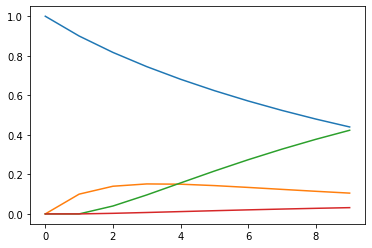

In [3]:
# insert your code below
import numpy as np
import matplotlib.pyplot as plt

t_0 = np.array([1, 0, 0, 0]) # [suseptible, Infected, Recovered, Deceased]
A = np.array([[.9, .07, 0, 0],[.1, .5, 0, 0],[0, 0.4, 1, 0],[0, 0.03, 0, 1]])
n_times = 10; times = np.arange(0, n_times, 1)
states_susceptible = []; states_infected = []
states_recovered = []; states_dead  = []

states = []
current_state = t_0
for time in times:
    states.append(current_state)
    next_state = A @ current_state
    states_susceptible.append(next_state[0])
    states_infected.append(next_state[1])
    states_recovered.append(next_state[2])
    states_dead.append(next_state[3])
    current_state = next_state

plt.plot(times, states)